In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import pickle as pkl

import warnings
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
df1 = df.copy()
# df1 is for customer found 7 and final
df1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [9]:
# x y split

X = df.drop(["Total Claim Amount"], axis = 1)
y = df["Total Claim Amount"]

# remove not necessary columns
X = X.drop(['Customer','Effective To Date'], axis = 1)

#Normalize (numerical).
scaler = StandardScaler()
X_num = X.select_dtypes(np.number)
scaler = StandardScaler()
scaler.fit(X_num)
X_num_scaled = scaler.transform(X_num)
#here X_num_scaled is numpy array format, I need to change it to Pandas dataframe 
X_num_scaled = pd.DataFrame(X_num_scaled, columns = X_num.columns)

### One Hot/Label Encoding (categorical).
 Concat DataFrames

In [10]:
X_cat = X.select_dtypes(include=['object'])
X_cat = pd.get_dummies(X_cat)

Concatenate DataFrames

In [11]:
X_new = pd.concat([X_num_scaled, X_cat], axis = 1 )

In [12]:
# LinearRegression
# I splited the X_new data and y data y is target. test_size is 0.3
# now 'model' is LinearRegression model object that X_train, y_train is trained.
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#for R2, MSE, RMSE, MAE I need these libraries.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#model has predict function and I can put X_test values to test those.
y_prediction = model.predict(X_test)

r2 = r2_score(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_prediction)
print(r2, mse, rmse, mae)

In [15]:
print(r2, mse, rmse, mae)

0.7644627685752556 19227.918999738547 138.6647720213701 94.69824906749362


For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:



In [16]:
#use the concept of multicollinearity and remove insignificant variables
import seaborn as sns


### From below I understood that I gotta remove Effective To date collumns, because it doesn't look important for the machine learning, let me remove those first and test again 
## Done

<AxesSubplot:>

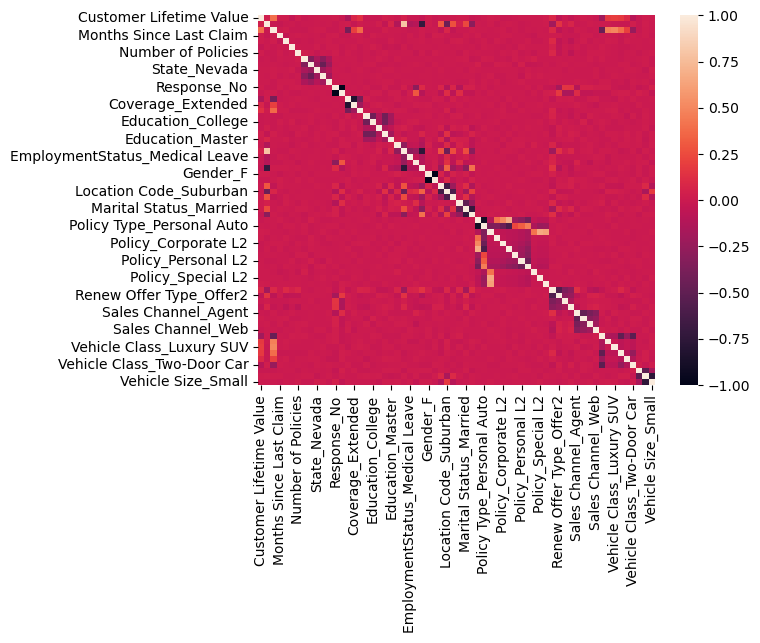

In [17]:
sns.heatmap(X_new.corr())

## removing outliar 

In [21]:
#dropping the outliers
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

df1 = remove_outliers(df1, threshold=1.5, in_columns=['Total Claim Amount', 'Customer Lifetime Value'])
df1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [26]:
# x y split

X = df1.drop(["Total Claim Amount"], axis = 1)
y = df1["Total Claim Amount"]

# remove not necessary columns
X = X.drop(['Customer','Effective To Date'], axis = 1)

#Normalize (numerical).
scaler = StandardScaler()
X_num = X.select_dtypes(np.number)
scaler = StandardScaler()
scaler.fit(X_num)
X_num_scaled = scaler.transform(X_num)
#here X_num_scaled is numpy array format, I need to change it to Pandas dataframe 
X_num_scaled = pd.DataFrame(X_num_scaled, columns = X_num.columns)

# one hot encoding
X_cat = X.select_dtypes(include=['object'])
X_cat = pd.get_dummies(X_cat)
X_new = pd.concat([X_num_scaled, X_cat], axis = 1 )

# LinearRegression
# I splited the X_new data and y data y is target. test_size is 0.3
# now 'model' is LinearRegression model object that X_train, y_train is trained.
model2 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=42)
model2.fit(X_train, y_train)

#for R2, MSE, RMSE, MAE I need these libraries.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#model has predict function and I can put X_test values to test those.
y_prediction = model2.predict(X_test)

r2 = r2_score(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_prediction)
print(r2, mse, rmse, mae)

ValueError: Found input variables with inconsistent numbers of samples: [8968, 7940]

In [27]:
len(X_new)

8968

In [28]:
len(y)

7940

In [30]:
X_new = pd.concat([X_num_scaled, X_cat], axis = 1 )
X_new

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,-1.078747,0.581257,-0.736412,1.696321,-1.544476,-0.424146,-0.826713,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.177987,0.333883,0.791794,0.301995,-0.359666,-0.424146,-0.421797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.491840,-1.273106,0.713424,0.301995,0.609724,-0.424146,1.602786,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.062607,0.171395,-0.579673,-0.295573,-0.144246,-0.424146,-0.826713,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.688210,0.799665,-0.736412,-0.096384,1.650920,-0.424146,-0.421797,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0

In [31]:
print(len(df1), len(X_new))

7940 8968
